In [17]:
!pip install kaggle


In [18]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [19]:
!kaggle datasets download -d antoreepjana/animals-detection-images-dataset -p /content/data --unzip


Dataset URL: https://www.kaggle.com/datasets/antoreepjana/animals-detection-images-dataset
License(s): CC0-1.0
100% 8.91G/8.92G [01:13<00:00, 211MB/s]
100% 8.92G/8.92G [01:13<00:00, 130MB/s]


In [20]:
!pip install torch torchvision torchaudio
!pip install opencv-contrib-python-headless
# install and import Ultralytics YOLOv8
!pip install ultralytics==8.0.196

In [21]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import yaml
# import packages to retrieve and display image files
import glob
import os
import shutil
from PIL import Image
from IPython.display import display

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [22]:
# store working directory path as work_dir
work_dir = os.getcwd()
# print work_dir path
print(os.getcwd())
# print work_dir contents
print(os.listdir(f"{work_dir}"))

/content
['.config', 'data']


In [32]:
import numpy as np
import pandas as pd
import glob
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt
# Set the path for the dataset in Colab
data_dir = "/content/data"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
# Get all the subdirectories of train and test
all_train_subdir = glob.glob(train_dir + "/*")
all_test_subdir = glob.glob(test_dir + "/*")

In [33]:
train_classes=[os.path.basename(pp) for pp in all_train_subdir]
test_classes=[os.path.basename(pp) for pp in all_test_subdir]

print("There is %d classes in train dataset, and %d classes in test dataset"%(len(train_classes), len(test_classes)))


There is 80 classes in train dataset, and 80 classes in test dataset


In [34]:
train_classes==test_classes

True

In [35]:
train_image_counts={os.path.basename(pp):[len(glob.glob(os.path.join(pp, "*.jpg")))] for pp in all_train_subdir}
test_image_counts={os.path.basename(pp):[len(glob.glob(os.path.join(pp, "*.jpg")))] for pp in all_test_subdir}
# all_image_counts=train_image_counts.copy()
# all_image_counts={k:all_image_counts[k]+test_image_counts[k] for k in all_image_counts.keys()}
train_data_df = pd.DataFrame(train_image_counts, index=["train"]).transpose()
test_data_df = pd.DataFrame(test_image_counts, index=["test"]).transpose()
all_data_df=train_data_df.copy()
all_data_df["test"]=test_data_df
all_data_df.head(10)

,train,test
Crab,309,114
Camel,67,27
Penguin,377,61
Seahorse,7,33
Tick,74,1
Hippopotamus,76,22
Cattle,70,171
Zebra,181,31
Bull,47,73
Jaguar,100,38


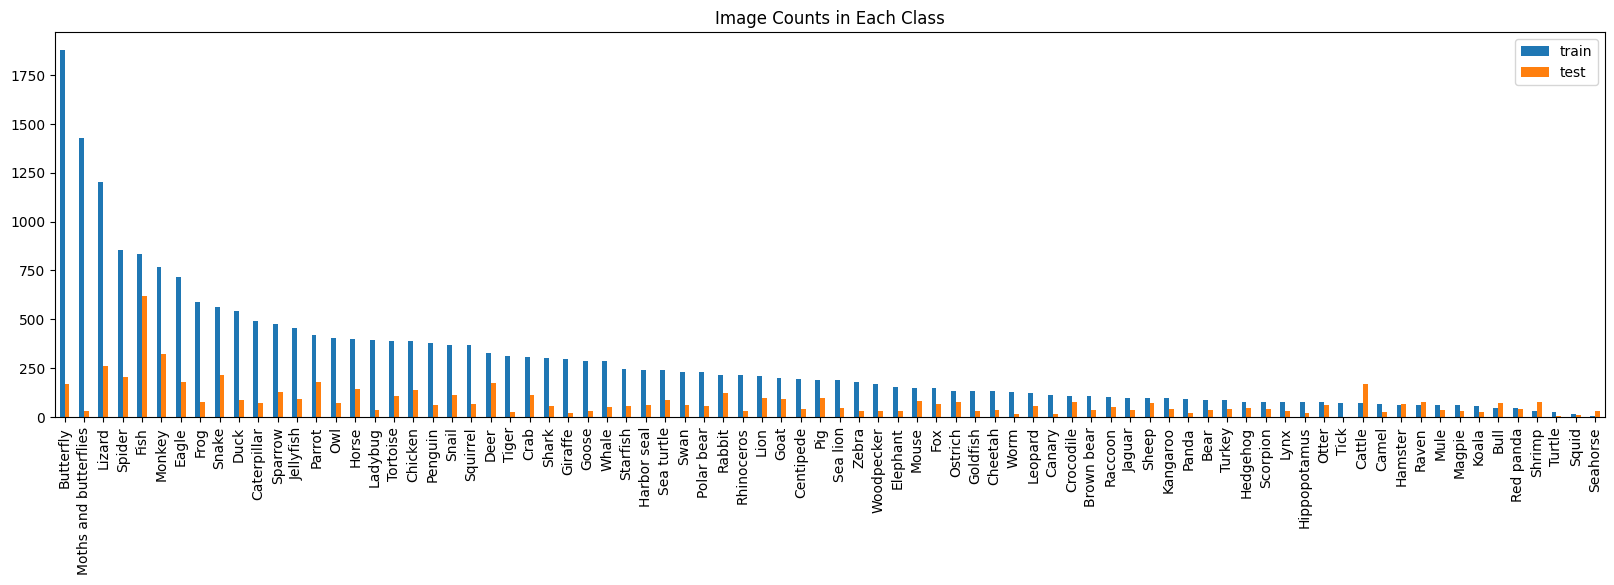

In [36]:
all_data_df=all_data_df.sort_values(by=["train","test"], ascending=False)
all_data_df.plot(kind="bar", legend=True, figsize=(20,5), title="Image Counts in Each Class");

In [28]:
!apt-get install -y file

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
file is already the newest version (1:5.41-3ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [38]:
# contents of new confg.yaml file
def update_yaml_file(file_path):
    data = {
        'path': f'/content/data',
        'train': f'/content/data/train',
        'val': f'/content/data/test',
        'names': {
            0: 'Cheetah',
            1: 'Fox',
            2: 'Jaguar',
            3: 'Lion',
            4: 'Tiger'
        }
    }

    # ensures the "names" list appears after the sub/directories
    names_data = data.pop('names')
    with open(file_path, 'w') as yaml_file:
        yaml.dump(data, yaml_file)
        yaml_file.write('\n')
        yaml.dump({'names': names_data}, yaml_file)

def organize_files(directory):
    for subdir in ['train', 'test', 'valid']:
        subdir_path = os.path.join(directory, subdir)
        if not os.path.exists(subdir_path):
            continue

        images_dir = os.path.join(subdir_path, 'images')
        labels_dir = os.path.join(subdir_path, 'labels')

        # create image and label subdirs if non-existent
        os.makedirs(images_dir, exist_ok=True)
        os.makedirs(labels_dir, exist_ok=True)

        # move images and labels to respective subdirs
        for filename in os.listdir(subdir_path):
            if filename.endswith('.txt'):
                shutil.move(os.path.join(subdir_path, filename), os.path.join(labels_dir, filename))
            elif filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                shutil.move(os.path.join(subdir_path, filename), os.path.join(images_dir, filename))
            # delete .xml files
            elif filename.endswith('.xml'):
                os.remove(os.path.join(subdir_path, filename))

if __name__ == "__main__":
    file_path = f"{work_dir}/data/config.yaml" #.yaml file path
    update_yaml_file(file_path)
    print(f"{file_path} updated successfully.")

/content/data/config.yaml updated successfully.
